梯度下降

In [1]:
# import image module
from IPython.display import Image

# get the image
Image(url="WechatIMG5.jpeg", width=300, height=300)

   distance  accuracy
0  0.314379 -0.707727
1  1.693777 -1.586669
2 -0.059695 -0.176699
3 -0.574047  0.372640
4  1.343083 -1.934584


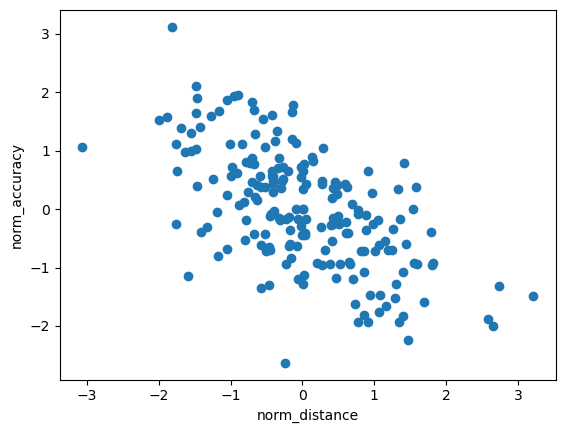

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pga = pd.read_csv('pga.csv')

# normalize the data
pga.distance = (pga.distance - pga.distance.mean()) / pga.distance.std()
pga.accuracy = (pga.accuracy - pga.accuracy.mean()) / pga.accuracy.std()
print(pga.head())

plt.scatter(pga.distance, pga.accuracy)
plt.xlabel('norm_distance')
plt.ylabel('norm_accuracy')
plt.show()

Cost function

In [4]:
## cost值越小越好
def cost(theta0, theta1, x, y):
    # initialize cost
    J = 0
    # number of observation
    m = len(x)
    for i in range(m):
        # compute the hypothesis
        h = theta1 * x[i] + theta0
        # add to cost
        J += (h - y[i]) ** 2
    # Average and normalize cost
    J /= (2 * m)
    return J

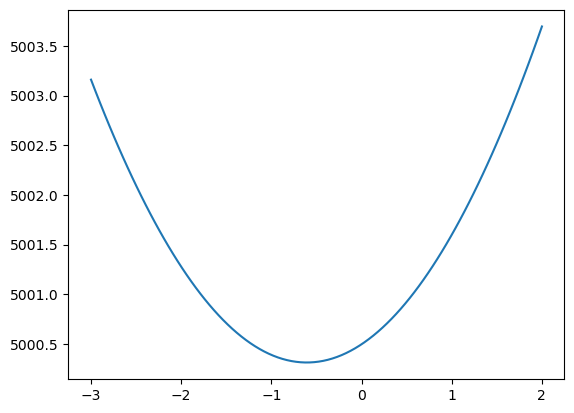

In [5]:
theta0 = 100
theta1s = np.linspace(-3, 2, 100)
costs = []
for theta1 in theta1s:
    costs.append(cost(theta0, theta1, pga.distance, pga.accuracy))
plt.plot(theta1s, costs)
plt.show()

Partial_derivative

In [6]:
def partial_cost_theta1(theta0, theta1, x, y):
    # hypothesis
    h = theta0 + theta1 * x
    diff = (h - y) * x
    partial = diff.sum() / x.shape[0]
    return partial


def partial_cost_theta0(theta0, theta1, x, y):
    # hypothesis
    h = theta0 + theta1 * x
    diff = h - y
    partial = diff.sum() / x.shape[0]
    return partial

Gradient descent

In [7]:
def gradient_descent(x, y, alpha=0.1, theta0=0, theta1=0):
    # alpha 步长，学习率
    max_epochs = 1000  # max num of iterations
    counter = 0
    c = cost(theta0, theta1, pga.distance, pga.accuracy)  # initial cost
    costs = [c]  # store each cost
    convergence_thres = 0.000001  #  收敛值
    cprev = c + 10
    theta0s = [theta0]
    theta1s = [theta1]

    while (np.abs(cprev-c)>convergence_thres) and (counter<max_epochs):
        cprev = c  # previous c
        update0 = alpha * partial_cost_theta0(theta0, theta1, x, y)
        update1 = alpha * partial_cost_theta1(theta0, theta1, x, y)
        theta0 -= update0
        theta1 -= update1

        theta0s.append(theta0)
        theta1s.append(theta1)

        c = cost(theta0, theta1, pga.distance, pga.accuracy)  # updated c

        costs.append(c)
        counter += 1

    return {'theta0': theta0, 'theta1': theta1, 'costs':costs}

Theta1 =  -0.6046983166379609


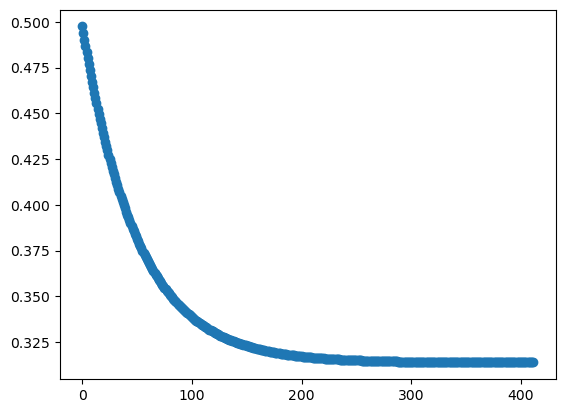

In [8]:
print('Theta1 = ', gradient_descent(pga.distance, pga.accuracy)['theta1'])
descend = gradient_descent(pga.distance, pga.accuracy, alpha=0.01)
plt.scatter(range(len(descend['costs'])), descend['costs'])
plt.show()